In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from tensorflow.keras.optimizers import Adam

In [4]:
data= pd.read_csv("/home/kapil/Desktop/my_deep_learning/santander-customer-satisfaction/train.csv")

In [5]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
data.shape

(76020, 371)

In [7]:
X= data.drop(labels=["ID", "TARGET"], axis=1)
X.shape

(76020, 369)

In [8]:
Y= data["TARGET"]

In [9]:
Y.shape

(76020,)

In [10]:
x_train, x_test, y_train, y_test= train_test_split(X,Y , test_size=0.2, random_state=0, stratify=Y)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

## Remove constant, Quassi constant and Duplicate Feature

In [12]:
filter= VarianceThreshold(0.01)
x_train = filter.fit_transform(x_train)
x_test= filter.transform(x_test)
x_train.shape, x_test.shape

((60816, 273), (15204, 273))

In [13]:
x_train_t= x_train.T
x_test_t= x_test.T

In [14]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)
x_train_t.shape

(273, 60816)

In [15]:
x_train_t.duplicated().sum()

17

In [16]:
duplicated_features= x_train_t.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [17]:
features_to_keep = [not index for index in duplicated_features]

In [18]:
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [19]:
x_train = x_train_t[features_to_keep].T
x_train.shape

(60816, 256)

In [20]:
x_test = x_test_t[features_to_keep].T
x_test.shape

(15204, 256)

In [21]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [22]:
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [23]:
x_train= x_train.reshape(60816,256,1)
x_test = x_test.reshape(15204,256,1)

In [24]:
x_train.shape, x_test.shape

((60816, 256, 1), (15204, 256, 1))

In [25]:
y_train = y_train.to_numpy()
y_test= y_test.to_numpy()

# Build CNN

In [26]:
model = Sequential()
model.add(Conv1D(32,3, activation='relu', input_shape=(256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))


model.add(Conv1D(64,3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))


model.add(Conv1D(128,3, activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

In [28]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history= model.fit(x_train, y_train, epochs= 10, validation_data= (x_test, y_test), verbose=1)

Epoch 1/10
1901/1901 [==============================] - 192s 101ms/step - loss: 0.2289 - accuracy: 0.9519 - val_loss: 0.1785 - val_accuracy: 0.9603
Epoch 2/10
1901/1901 [==============================] - 197s 104ms/step - loss: 0.1788 - accuracy: 0.9592 - val_loss: 0.1802 - val_accuracy: 0.9603
Epoch 3/10
1901/1901 [==============================] - 201s 106ms/step - loss: 0.1690 - accuracy: 0.9601 - val_loss: 0.1751 - val_accuracy: 0.9603
Epoch 4/10
1901/1901 [==============================] - 203s 107ms/step - loss: 0.1665 - accuracy: 0.9603 - val_loss: 0.1723 - val_accuracy: 0.9603
Epoch 5/10
1901/1901 [==============================] - 208s 109ms/step - loss: 0.1632 - accuracy: 0.9603 - val_loss: 0.1722 - val_accuracy: 0.9604
Epoch 6/10
1901/1901 [==============================] - 212s 111ms/step - loss: 0.1604 - accuracy: 0.9603 - val_loss: 0.1729 - val_accuracy: 0.9605
Epoch 7/10
1901/1901 [==============================] - 211s 111ms/step - loss: 0.1570 - accuracy: 0.9604 - val_

In [31]:
def plot_learning_curve(history, epochs):
    epoch_range= range(1, epochs+1);
    plt.plot(epoch_range, history.history['accuracy'], history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["train", "val"], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'], history.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["train", "val"], loc='upper left')
    plt.show()
    
    

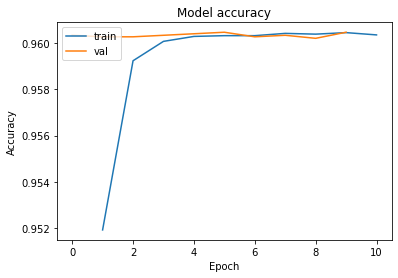

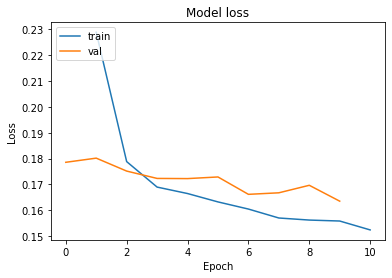

In [32]:
plot_learning_curve(history, 10)